<Axes: xlabel='skill_count', ylabel='skill_pay'>

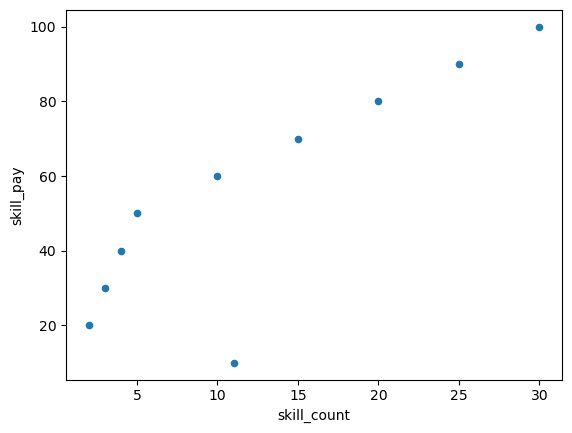

In [35]:
import pandas as pd
data = {
    'job_skills': ['python', 'sql', 'java', 'c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
    'skill_count': [30, 25, 20, 15, 10, 5, 4, 3, 2, 11],
    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}

df = pd.DataFrame(data)
df.plot(kind='scatter', x='skill_count', y='skill_pay')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#loading data
dataset = load_dataset('coachprerakmehta/data_jobs')
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) and pd.notna(skill_list) else skill_list)
#If it's already a list (or is NaN), leave it as-is.

In [37]:
df = df[df['job_title_short'] == 'Data Analyst']

In [38]:
df_explode = df.explode('job_skills')
skill_stats = df_explode.groupby('job_skills').agg(
    median_salary = ('salary_year_avg', 'median'),      #For each skill, take the median of the salary_year_avg values.
    skill_count = ('job_skills', 'count') )             #For each skill, count how many times it appears (i.e. how many job listings mention it).


In [39]:
skill_stats = skill_stats.sort_values('skill_count', ascending=False).head(10)

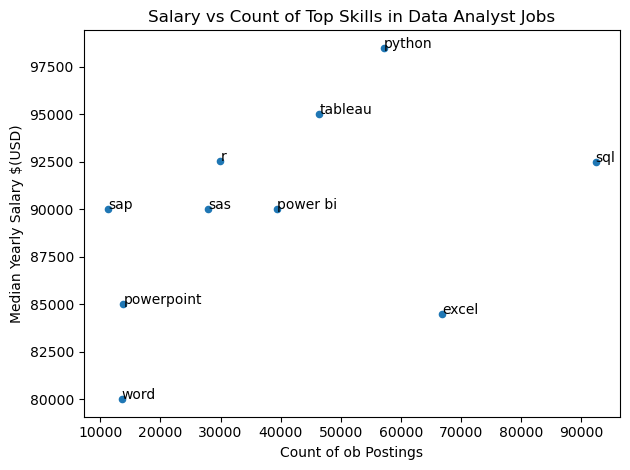

In [ ]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of ob Postings')
plt.ylabel('Median Yearly Salary $(USD)')
plt.title('Salary vs Count of Top Skills in Data Analyst Jobs')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)      #At the point where skill_count is X and median_salary is Y, show the skill name as a label.
plt.show()